# Trabajo de Inteligencia Artificial

## Análisis de sentimientos

Realizado por:
- Alicia Sánchez Hossdorf
- Rafael Segura Gómez

Fecha: 26/05/2023

Convocatoria de Junio

<h1> 1. Recopilación de datos. </h1>

In [1]:
import pandas
import numpy
from textblob import TextBlob

Hemos descargado todos los tweets que necesitamos en un CSV. Por lo que debemos leer los datos del archivo.

In [2]:
tweetsCSV = pandas.read_csv("../Notebook/Tweets/Tweets_entrenamiento.csv", header=0)

Para saber cuantos tweets tenemos, miraremos cuantas filas tiene el archivo.

In [3]:
print(tweetsCSV.shape)

(27480, 4)


In [4]:
# 10 primeras filas
tweetsCSV.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


Como solo necesitamos la columna text, que es donde viene los tweets que necesitamos, haremos una seleccion de dicha columna.


In [5]:
tweets = tweetsCSV[['text']]

In [6]:
tweets.head(20)

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
5,http://www.dothebouncy.com/smf - some shameles...
6,2am feedings for the baby are fun when he is a...
7,Soooo high
8,Both of you
9,Journey!? Wow... u just became cooler. hehe....


<h1> 2. Eliminar las palabras que no aportan información </h1>

In [7]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk import download

download('punkt', download_dir='.')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sWords = set(stopwords.words('english'))
print(sWords)

{'herself', 'so', 'after', 'myself', 'theirs', "wouldn't", "isn't", 'his', 'were', 'as', 'yours', 'being', 'aren', 'you', "should've", 'wouldn', 'these', "hasn't", 'was', 'who', 'the', 'those', 'most', "shan't", "aren't", 'only', 'mustn', 'of', 'at', 'how', "you've", 'between', 'here', 'don', 'too', 'its', 'having', 'd', 'himself', 'haven', 'be', 'has', 'doing', 'out', 'but', 'such', 'their', 'no', 'same', 'for', 'does', 'against', 'further', 'into', 'all', "shouldn't", 'are', 'again', 'can', 'or', 'him', 'about', 'through', 'should', 'ma', 'not', 'which', 'our', "weren't", 'once', 'there', "hadn't", 'it', 'above', "doesn't", 'will', 'couldn', "she's", 'll', 'other', 'from', 'been', 'doesn', 'hasn', 'when', 'whom', 'did', "wasn't", 'shan', 'now', 'down', 'm', "haven't", 's', "mightn't", 'while', 'she', 'why', 'own', 'needn', 'won', 've', 'each', 'y', 'to', 'if', 'do', 'over', 'during', 'had', "don't", 'under', 'my', 'hers', 'a', 'they', "mustn't", "you'll", 'that', 'nor', "you'd", 'its

Crear una función clean_text para eliminar las palabras comunes y poco informativas; eliminar menciones, hashtags, URLs y cualquier otro símbolo extraño; y que utilice técnicas de lematización (stemming) y tokenización para reducir las palabras a su forma base

In [11]:
#Funcion para eliminar las stop words y tokenizado.

def delete_stopWords(tweet):
    tweetLow = tweet.lower()
    tweetWords = word_tokenize(tweetLow)
    tweetFiltered = []
        
    for w in tweetWords:
        if w not in sWords:
            tweetFiltered.append(w)
    return tweetFiltered

In [12]:
#Esta funcion es para eliminar menciones, hashtags, URLs y cualquier otro símbolo extraño.

def delete_otherElements(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("http[^\s]+","",tweet)
    tweetFiltered = re.sub(r"[-()\"#/@;:<>{}+=*~|.!?,]", "", tweet)

    return tweetFiltered
    

## Función para limpiar el text

Con los tweets tokenizados, lematizados y sin stop words lo pasamos a lista.

In [13]:
def clean_text(Tweets): 
    res = Tweets.copy()
    i = 0;
    #Iniciar SnowBall Stemmer con idioma ingles
    stemmer = SnowballStemmer("english")
    while i<len(Tweets):
        tweet_cleaned = []
        
        clean_t = delete_otherElements(Tweets['text'].get(i))
        
        #__Para corregir gramaticalmente descomentar la siguiente linea__
        #clean_t = str(TextBlob(clean_t).correct())
        
        tNoStopWords = delete_stopWords(clean_t)
        #Esto es para la lematización de la frase. 
        for w in tNoStopWords:
            if w != "`":
                tweet_cleaned.append(stemmer.stem(w))
        res.at[i,'text'] = tweet_cleaned
        
        i+=1
    return res

In [14]:
tweets_cleaned = clean_text(tweets)

In [15]:
print(tweets_cleaned.head(20))

                                                 text
0                                       [respond, go]
1                       [sooo, sad, miss, san, diego]
2                                       [boss, bulli]
3                             [interview, leav, alon]
4                 [son, put, releas, alreadi, bought]
5       [shameless, plug, best, ranger, forum, earth]
6                  [2am, feed, babi, fun, smile, coo]
7                                       [soooo, high]
8                                                  []
9     [journey, wow, u, becam, cooler, hehe, possibl]
10  [much, love, hope, reckon, chanc, minim, p, ne...
11  [realli, realli, like, song, love, stori, tayl...
12                    [sharpi, run, danger, low, ink]
13             [want, go, music, tonight, lost, voic]
14                             [test, test, lg, env2]
15                                  [uh, oh, sunburn]
16               [ok, tri, plot, altern, speak, sigh]
17  [sick, past, day, thus, 

### A partir de aquí, hasta el etiquetado de datos, solamente es prueba de corrección gramatical, se puede ignorar, son pruebas

In [16]:
# Corrige el dataframe y muestra ambas columnas, corregido y original, no modifica variables originales
#tweets_cleaned['text_corregido'] = tweets_cleaned['text'].apply(lambda x: str(TextBlob(" ".join(x)).correct()))


#print(tweets_cleaned.head(20))

In [17]:
# Muestra el dataframe con los textos corregidos
#tweets_cleaned[['text_corregido']]

## Etiquetado de datos

Documentar:
- !pip install textblob

In [18]:
import os
import csv
from textblob import TextBlob

In [19]:

def tag_text(text):
    tweet = ' '.join(text)  # Convertir la lista de palabras en una cadena de text
    blob = TextBlob(tweet) #Convierte los tweets a tipo Blob para aplicarle la libreria
    tag = blob.sentiment.polarity #Polaridad entre -1 y 1, de peor a mejor respectivamente
    return text, tag

csv_path = 'Tweets/resultados.csv'

#Escritura en un archivo CSV nuevo
with open(csv_path, 'w', newline='',encoding='utf-8-sig') as csv_file: #Forzamos formato utf-8, otro da problemas
    writer = csv.writer(csv_file)
    writer.writerow(['text', 'tag', 'sentiment']) #Crea columna sentiment también
    
    if len(tweets_cleaned) == 0:  #Checkea si está vacío
        print("Nothing to tag, espabila notas.")
        exit()

    for _, row in tweets_cleaned.iterrows(): #Usamos iterrows porque tweets_cleaned es de tipo dataframe
       # if row['text']:  # Verificar si el campo 'text' no está vacío
            result = tag_text(row['text'])
            result = (*result, '')  # Añadir una cadena vacía para la columna "sentiment"
            writer.writerow(result)


In [20]:
#Categorizando los tags a valores discretos
def etiqueta_codificada(etiqueta):
    if etiqueta >= -1 and etiqueta < -0.5:
        return "hater"
    elif etiqueta >= -0.5 and etiqueta < 0:
        return "molesto"
    elif etiqueta == 0:
        return "neutro"
    elif etiqueta > 0 and etiqueta <= 0.5:
        return "contento"
    elif etiqueta > 0.5 and etiqueta <= 1:
        return "muy feliz"
    else:
        return "null"


In [21]:
#Actualizar la columna sentiment del csv
# Leer el archivo CSV
csv_path = 'Tweets/resultados.csv'
df = pandas.read_csv(csv_path)

# Aplicar la función etiqueta_codificada para asignar los valores de tag a sentiment
df['sentiment'] = df['tag'].apply(etiqueta_codificada)



# Guardar el archivo CSV actualizado
df.to_csv(csv_path, index=False)

In [22]:
tweets_results = pandas.read_csv("../Notebook/Tweets/resultados.csv", header=0)

In [23]:
print(tweets_results.shape)

(27480, 3)


In [24]:
# 10 primeras filas
tweets_results.head(20)

,text,tag,sentiment
0,"['respond', 'go']",0.000000,neutro
1,"['sooo', 'sad', 'miss', 'san', 'diego']",-0.500000,molesto
2,"['boss', 'bulli']",0.000000,neutro
3,"['interview', 'leav', 'alon']",0.000000,neutro
4,"['son', 'put', 'releas', 'alreadi', 'bought']",0.000000,neutro
5,"['shameless', 'plug', 'best', 'ranger', 'forum...",1.000000,muy feliz
6,"['2am', 'feed', 'babi', 'fun', 'smile', 'coo']",0.300000,contento
7,"['soooo', 'high']",0.160000,contento
8,[],0.000000,neutro
9,"['journey', 'wow', 'u', 'becam', 'cooler', 'he...",0.100000,contento


### Entrenamiento del modelo
Necesitamos separar los datos que tenemos en conjunto de entrenamiento y conjunto de pruebas, para probar que funciona bien e ir entrenando el modelo.

A partir de aqui, pruebitas

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [72]:
#Cojo la columna text
tweets = tweets_results['text']

#Creamos el vector
vect = CountVectorizer()

#Vectorizamos los tweets
codified_text = vect.fit_transform(tweets)

#Averlo?
#print(codified_text)

In [73]:
#Codificador para el objetivo
cod_target = preprocessing.LabelEncoder()

#Sacamos la columna sentiment del CSV de results
codified_target = cod_target.fit_transform(tweets_results['sentiment'])

#Printi printi
print(codified_target)

[4 2 4 ... 3 0 0]


In [28]:
train_text, test_text, train_target, test_target = train_test_split(codified_text, codified_target, 
                                                                    random_state=12345, 
                                                                    test_size=0.33)

print('Training data size: ', train_text.shape)
print('Test data size: ', test_text.shape)

Training data size:  (18411, 22865)
Test data size:  (9069, 22865)


In [29]:
#Tf-idf

#Creamos instancia vector tfidf
vectorizer_tfidf = TfidfTransformer()

train_text_tfidf = vectorizer_tfidf.fit_transform(train_text)

test_text_tfidf = vectorizer_tfidf.transform(test_text)

print('Training tfidf data size: ', train_text_tfidf.shape)
print('Test tfidf data size: ', test_text_tfidf.shape)

Training tfidf data size:  (18411, 22865)
Test tfidf data size:  (9069, 22865)


### Naive Bayes
Con los conjuntos de prueba y entrenamiento en tf-idf vamos a entrenar los modelos, empezamos por Naive Bayes. Usamos MultinomialNB porque tenemos un vector disperso de datos, funcionando bien para conjunto de datos enormes (como nuestro caso), para trabajar con CategoricalNB haría falta crear una matriz densa y eso puede dar problemas si el conjunto de datos es enorme.

In [30]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [31]:
#Creamos el modelo, con suavizado (alpha=1.0)
modelNB = MultinomialNB(alpha=1.0)

#Lo entrenamos con los datos de entrenamiento
modelNB.fit(train_text, train_target)

MultinomialNB()

In [64]:
#Hacemos prediccion con los datos de prueba
testNB = modelNB.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelNB.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testNB))

Tasa de acierto, calculada con predict           0.7706472598963502
Tasa de acierto, calculada con accuracy_score    0.7706472598963502


### k-Nn

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='cosine') #Usamos coseno porque es mejor para clasificar texto

In [35]:
#Creamos el modelo con los parametros deseados
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='cosine') #Usamos coseno porque es mejor para clasificar texto

#Lo entrenamos con los datos de entrenamiento
modelKNN.fit(train_text, train_target)

KNeighborsClassifier(metric='cosine')

In [36]:
#Hacemos prediccion con los datos de prueba
testKNN = modelKNN.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelKNN.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testKNN))

Tasa de acierto, calculada con predict           0.6572940787297387
Tasa de acierto, calculada con accuracy_score    0.6572940787297387


### Arbolito arbolito

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Creamos modelo con arbol, profundidad 3, criterio Entropy
modelTree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=12345)

#Lo entrenamos con los datos de entrenamiento
modelTree.fit(train_text, train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=12345)

In [39]:
#Hacemos prediccion con los datos de prueba
testTree = modelTree.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelTree.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testTree))

Tasa de acierto, calculada con predict           0.5693020178630499
Tasa de acierto, calculada con accuracy_score    0.5693020178630499


In [40]:
#Creamos modelo con arbol, profunidad 5, criterio Gini
modelTree2 = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=12345)
,
#Lo entrenamos con los datos de entrenamiento
modelTree2.fit(train_text, train_target)

#Hacemos prediccion con los datos de prueba
testTree2 = modelTree2.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelTree2.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testTree2))

Tasa de acierto, calculada con predict           0.608556621457713
Tasa de acierto, calculada con accuracy_score    0.608556621457713


Comprobamos que el árbol de decisión con criterio de entropía y profundidad 3 conseguimos la tasa de aciertos más alta (hemos probado valores).


Invertimos los valores de los objetivos para comprobar los datos y ver como ha predecido (spoiler: mal)

In [41]:
#Sentimientos antes del modelo

cod_target.inverse_transform(test_target)

array(['neutro', 'muy feliz', 'neutro', ..., 'contento', 'contento',
       'neutro'], dtype=object)

In [42]:
#Sentimientos despues del modelo

cod_target.inverse_transform(testNB)

array(['neutro', 'contento', 'neutro', ..., 'contento', 'contento',
       'neutro'], dtype=object)

## Analisis de tweets
Hacemos scrapping de algun usuario de Twitter, algun influencer, y analizamos

In [43]:
import importlib

if importlib.util.find_spec("selenium") is None:
    !pip install selenium
    print("Installed selenium succesfully")
else:
    print("Selenium is already installed")

Selenium is already installed


In [117]:
import os
import csv
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

def scrape_tweets(username, amount=10):
    all_the_tweets = []  # Una lista para almacenar todos los tweets de una página
    driver = webdriver.Chrome()  # Requiere tener instalado el driver de Chrome
    driver.get(f"https://twitter.com/{username}")
    sleep_time = 3
    time.sleep(sleep_time)  # Espera unos segundos para que se carguen los tweets

    # Repetir el proceso hasta que tenga 100 tweets
    while len(all_the_tweets) < amount:
        # Desplazarse hacia abajo para cargar más tweets (opcional)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_time)  # Espera adicional para cargar más tweets si es necesario

        page_source = driver.page_source

        soup = BeautifulSoup(page_source, "html.parser")
        tweets = soup.find_all("div", attrs={"data-testid": "tweetText"})
        all_the_tweets += tweets

    driver.quit()
    
    if all_the_tweets:
        # Obtener la ruta relativa al directorio del proyecto
        script_directory = os.path.join(os.getcwd(), "influencers")
        # crear el directorio si no existe
        if not os.path.exists(script_directory):
            os.makedirs(script_directory)
            print(f"Se ha creado el directorio {script_directory}")
        file_path = os.path.join(script_directory, f"tweets_{username}.csv")

        with open(file_path, "w", encoding="utf-8", newline="",) as file:
            writer = csv.writer(file)
            writer.writerow(["text"])  # Escribir la fila de encabezado
            for tweet in all_the_tweets:
                tweet_span = tweet.find_next("span")
                tweet_text = tweet_span.get_text(strip=True)
                tweet_text = tweet_text.replace("\n", " ")  # Eliminar los saltos de línea del contenido del tweet
                writer.writerow([tweet_text])

              #  print(tweet_text)
              #  print("------------------------")

        print(f"Los nuevos tweets se han guardado en {file_path}")
    else:
        print("No se encontró el contenedor de tweets.")

# Ejemplo de uso
scrape_tweets("elonmusk", 100)
scrape_tweets("LinusTech", 100)
scrape_tweets("Pontifex", 100)
scrape_tweets("realDonaldTrump", 100)
scrape_tweets("Cobratate", 100)
scrape_tweets("xQc", 100)
scrape_tweets("jk_rowling", 100)
scrape_tweets("keemstar", 100)
scrape_tweets("adinross", 100)
scrape_tweets("bbcnews", 100)

Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_faze_rain.csv


Analizamos los tuits de los influencers, para ver como de capullos son:

In [108]:
import matplotlib.pyplot as plt

def sentiments(username: str):
    user_tweetsCSV = pandas.read_csv(f"../Notebook/influencers/tweets_{username}.csv", header=0)
    #print(user_tweetsCSV.shape)
    user_tweets = user_tweetsCSV[['text']]

    user_cleaned = clean_text(user_tweets)

    # Codificamos los tweets para la predicción de pontifex

    tweets_user = user_cleaned['text']

    # Convertimos las listas de palabras en cadenas de texto
    tweets_user_str = [' '.join(tweet) for tweet in tweets_user]

    vect.fit(tweets)

    # Utilizamos el vectorizador previamente ajustado para transformar los tweets de pontifex
    codified_text_user = vect.transform(tweets_user_str)

    userNB = modelNB.predict(codified_text_user)

    tag, freq = numpy.unique(cod_target.inverse_transform(userNB), return_counts=True)

    plt.figure(figsize=(8, 6))
    plt.pie(freq, labels=tag, autopct='%1.1f%%')
    plt.title(f'Sentimientos de {username}')
    plt.show()

(104, 1)


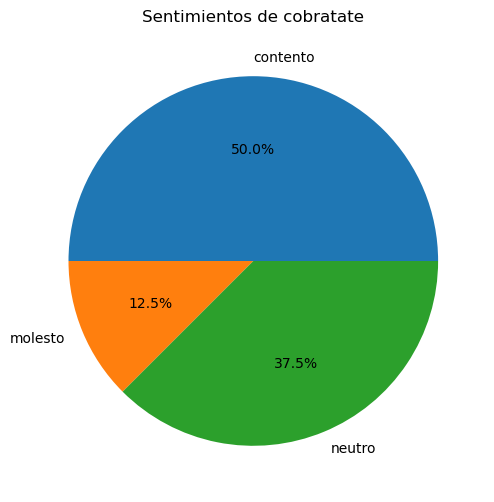

(103, 1)


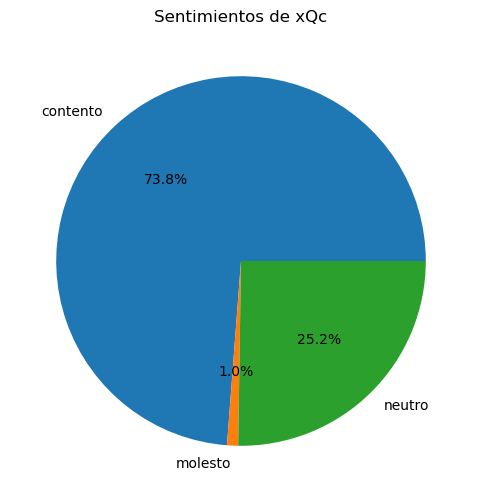

(101, 1)


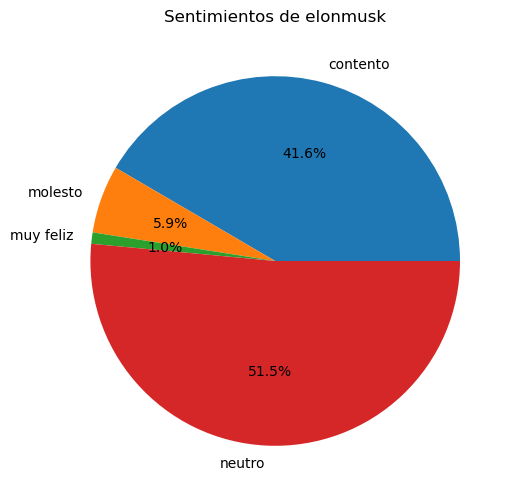

(110, 1)


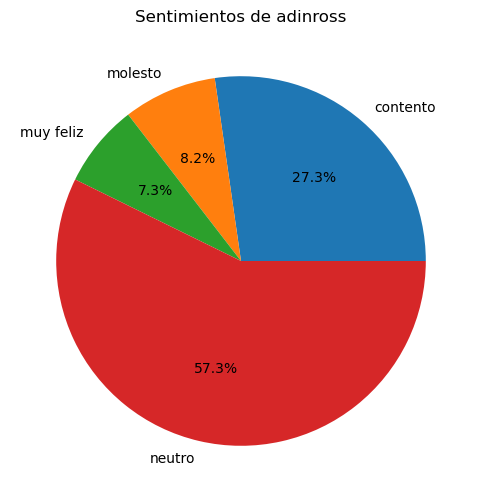

(107, 1)


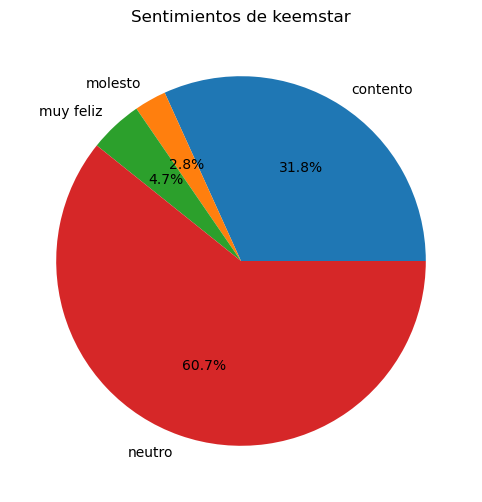

(108, 1)


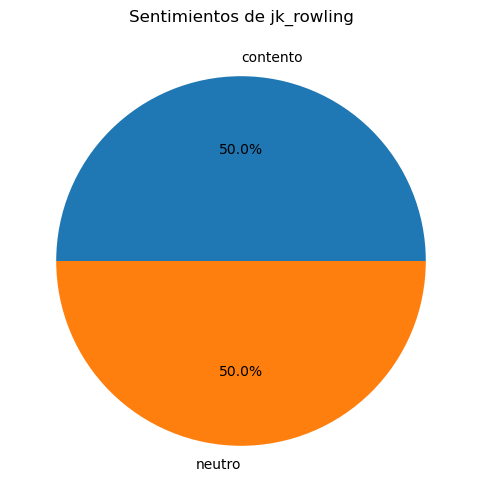

(100, 1)


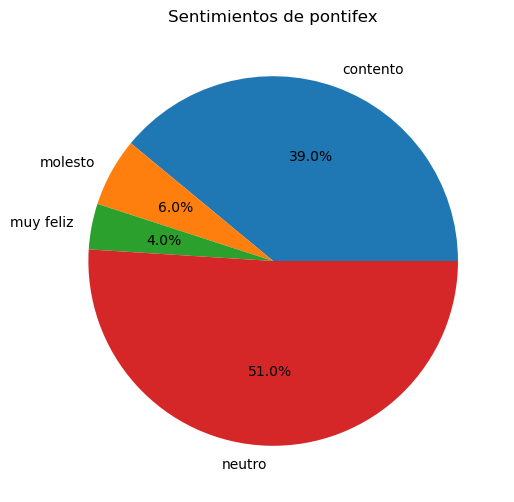

(106, 1)


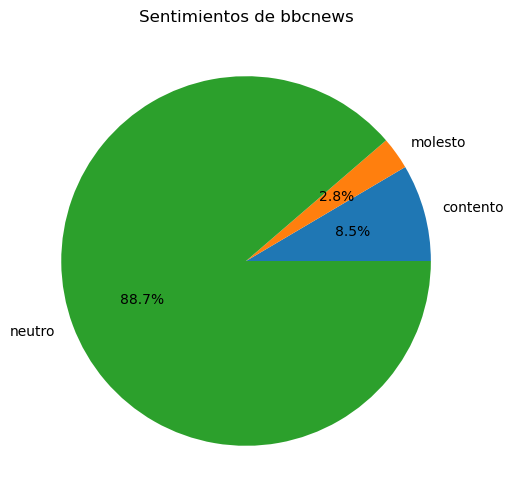

(101, 1)


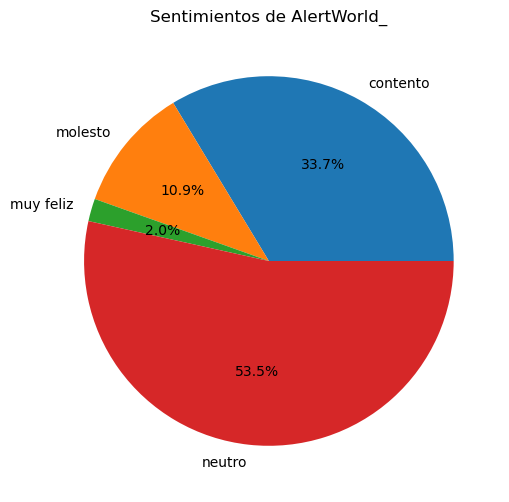

(128, 1)


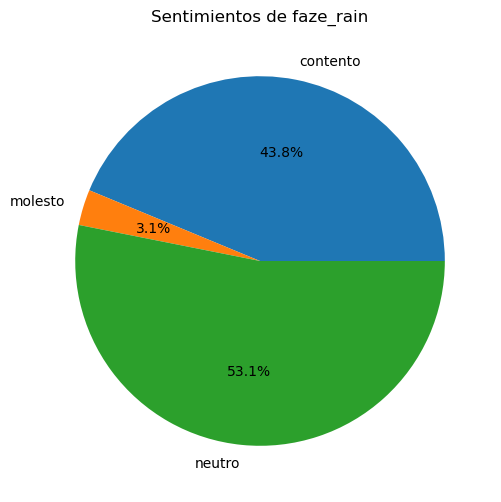

In [118]:
usernames=['cobratate','xQc','elonmusk','adinross','keemstar','jk_rowling','pontifex','bbcnews','AlertWorld_','faze_rain']
for user in usernames:
    sentiments(user)